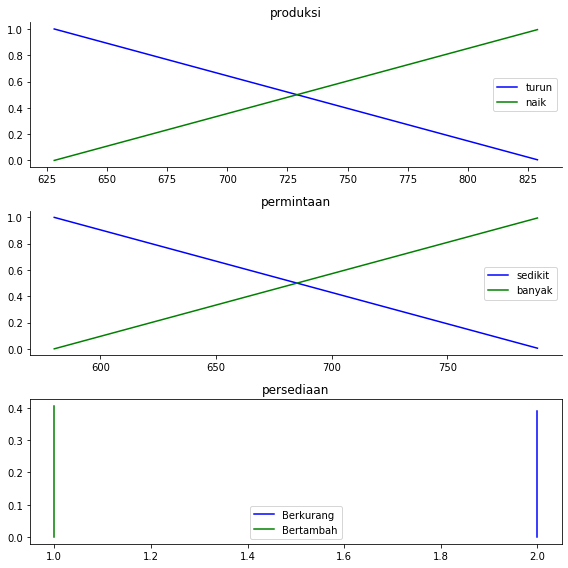

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

# Generate universe variables
x_produksi = np.arange(628, 830, 1)
x_permintaan = np.arange(580, 790, 1)

# Generate fuzzy membership functions
produksi_turun = fuzz.trimf(x_produksi, [0, 628, 830])
produksi_naik  = fuzz.trimf(x_produksi, [628, 830, 830])

permintaan_sedikit = fuzz.trimf(x_permintaan, [0, 580, 790])
permintaan_banyak  = fuzz.trimf(x_permintaan, [580, 790 , 790])

#Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 8))

ax0.plot(x_produksi, produksi_turun, 'b', linewidth=1.5, label='turun')
ax0.plot(x_produksi, produksi_naik, 'g', linewidth=1.5, label='naik')

ax0.set_title('produksi')
ax0.legend()

ax1.plot(x_permintaan, permintaan_sedikit, 'b', linewidth=1.5, label='sedikit')
ax1.plot(x_permintaan, permintaan_banyak, 'g', linewidth=1.5, label='banyak')

ax1.set_title('permintaan')
ax1.legend()

B=0.390
T=0.406

ax2.plot([2, 2], [0, B], 'b', linewidth=1.5, label='Berkurang')
ax2.plot([1, 1], [0, T], 'g', linewidth=1.5, label='Bertambah')

ax2.set_title('persediaan')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [2]:
## FAM
TD=0.406;ND=0.594;BT=0.390;BN=0.609
FAM = [[TD, ND],[BT, BN]]

In [3]:
## input Crisp
in_produksi = 710
in_permintaan = 662

In [4]:
# Fuzzification
in_1 = []
in_1.append(fuzz.interp_membership(x_produksi, produksi_turun, in_produksi))
in_1.append(fuzz.interp_membership(x_produksi, produksi_naik, in_produksi))

in_2 = []
in_2.append(fuzz.interp_membership(x_permintaan, permintaan_sedikit, in_permintaan))
in_2.append(fuzz.interp_membership(x_permintaan, permintaan_banyak, in_permintaan))

print("Derajat Keanggotaan produksi:")
if in_1[0]>0 :
    print("turun :"+ str(in_1[0]))
if in_1[1]>0 :
    print("naik        :"+ str(in_1[1]))
    
print("")
print("Derajat Keanggotaan permintaan:")
if in_2[0]>0 :
    print("Sedikit  :"+ str(in_2[0]))
if in_2[1]>0 :
    print("banyak         :"+ str(in_2[1]))

Derajat Keanggotaan produksi:
turun :0.594059405940594
naik        :0.40594059405940597

Derajat Keanggotaan permintaan:
Sedikit  :0.6095238095238096
banyak         :0.3904761904761905


In [5]:
print("Matriks produksi:")
print(in_1)
print("")
print("Matriks permintaan:")

print(in_2)

Matriks produksi:
[0.594059405940594, 0.40594059405940597]

Matriks permintaan:
[0.6095238095238096, 0.3904761904761905]


In [6]:
## Inference dan Defazzification dengan Centroid Sugeno: 
#Penyebut
rul = []
for i in range(2):
    for j in range(2):
        rule=fuzz.relation_min(in_1[i], in_2[j])
        rul.append(rule)
        #print(rule)
penyebut=np.sum(rul)
#Pembilang
rul = []
for i in range(2):
    for j in range(2):
        rule=fuzz.relation_min(in_1[i], in_2[j])
        rulxx= rule*FAM[i][j]
        rul.append(rulxx)
        #print(rulxx)
pembilang=np.sum(rul)
hasil = pembilang/penyebut

## Logic untuk hasil
print("Index persediaan :"+ str(hasil))
if hasil >=0.390 and hasil < 0.406 :
    za = (abs(hasil-0.390)/(0.406-0.390))*100
    zb = (abs(hasil-0.406)/(0.406-0.390))*100
    print("berkurang :"+ '{:2.2f}'.format(zb)+" %")
    print("bertambah  :"+ '{:2.2f}'.format(za)+" %")
    
if hasil>=0.406:
    za = (abs(hasil-0.406)/(1.0-0.406))*100
    print("bertambah :"+ '{:2.2f}'.format(za)+" %")

Index persediaan :0.4880803197966856
bertambah :13.82 %


In [7]:
## Inference dan Defazzification dengan 
# Metode MAX:
rul = []
for i in range(2):
    for j in range(2):
        rule=fuzz.relation_min(in_1[i], in_2[j])
        rul.append(rule)
        #print(rule)
maxi=np.max(rul)
print(maxi)

0.594059405940594
